# Sample Corpus


In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


# Text Pre-processing


In [2]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree.Charran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree.Charran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [6]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

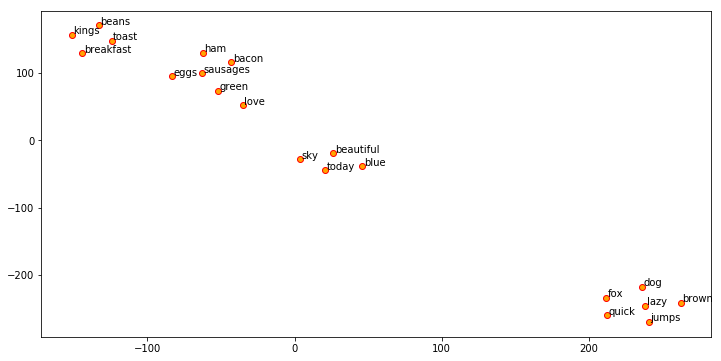

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [8]:
w2v_model.wv['sky'], w2v_model.wv['sky'].shape

(array([-0.7215997 ,  0.3986283 , -0.6680269 ,  0.66054356, -0.5674717 ,
         0.52747077,  0.10689218, -0.9838653 ,  0.42021424, -0.5687308 ,
         0.05589546, -1.7023201 ,  0.10276194,  0.8689182 , -0.29585996],
       dtype=float32), (15,))

In [9]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,-0.721600,0.398628,-0.668027,0.660544,-0.567472,0.527471,0.106892,-0.983865,0.420214,-0.568731,0.055895,-1.702320,0.102762,0.868918,-0.295860
blue,-0.703183,0.123861,-0.316222,0.517077,-0.609053,0.266729,0.151603,-0.381073,0.360817,-0.261540,-0.355001,-1.130834,0.229591,0.564293,-0.240216
lazy,-1.360278,-0.675438,0.433867,0.312701,-1.009709,-0.089161,0.358605,0.154456,0.584093,-0.182177,-0.860098,-1.037360,-0.415237,-0.382300,-0.768788
beautiful,-0.650575,0.146414,-0.718057,0.400545,-0.338031,0.535906,0.165847,-0.872008,0.238708,-0.406279,-0.048958,-1.629995,0.098252,0.993512,-0.199611
quick,-1.596651,-0.405228,0.294921,0.109131,-0.648057,-0.309540,0.543677,0.190225,0.550808,0.055121,-0.499802,-0.983545,-0.416437,-0.233300,-1.013917
fox,-1.572911,-0.423082,0.165371,0.137052,-0.845388,-0.316418,0.501485,0.253424,0.663122,0.139985,-0.598832,-1.063145,-0.326173,-0.264233,-0.980717
dog,-1.636788,-0.416474,0.160034,0.390335,-0.859647,-0.336731,0.477311,0.181162,0.427843,-0.032453,-0.496028,-0.858824,-0.612918,-0.044174,-1.065001
brown,-1.476136,-0.707271,0.208150,0.351077,-1.011055,-0.232821,0.103124,0.225209,0.576318,-0.066174,-0.531662,-1.070936,-0.662855,-0.286278,-0.852890
bacon,-0.684535,0.048522,-0.987693,-0.530764,-0.061173,0.348602,0.439170,-1.335244,-0.080792,-0.361497,-0.033452,-0.371038,-0.235693,-1.047080,0.497383
love,-0.202070,0.189582,-0.640443,-0.084159,-0.176949,0.287440,0.084452,-1.034437,0.004128,-0.512011,0.195958,-0.681063,-0.066282,-0.090826,0.223230


## Term semantic similarity

In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,lazy,beautiful,quick,fox,dog,brown,bacon,love,eggs,ham,sausages,jumps,today,kings,breakfast,toast,green,beans
sky,1.000000,0.936388,0.415304,0.981017,0.411824,0.428687,0.449794,0.434377,0.332565,0.738670,0.340498,0.352743,0.350782,0.328223,0.989920,0.148699,0.142033,0.179729,0.491363,0.136580
blue,0.936388,1.000000,0.629188,0.918465,0.598237,0.630600,0.630136,0.617717,0.218850,0.548826,0.186146,0.223380,0.218032,0.540437,0.921834,0.058480,0.057735,0.068471,0.329034,0.039441
lazy,0.415304,0.629188,1.000000,0.381732,0.949650,0.958924,0.943378,0.974238,0.135590,0.093976,0.131124,0.122123,0.131594,0.977697,0.371090,0.218610,0.219997,0.180991,0.064889,0.209476
beautiful,0.981017,0.918465,0.381732,1.000000,0.387701,0.402371,0.417961,0.400253,0.335611,0.729013,0.334153,0.376275,0.354693,0.297835,0.995237,0.155783,0.156988,0.189642,0.486416,0.148259
quick,0.411824,0.598237,0.949650,0.387701,1.000000,0.992442,0.980478,0.954818,0.133691,0.072355,0.141745,0.126162,0.156929,0.979276,0.367553,0.274763,0.259621,0.244662,0.069867,0.256344
fox,0.428687,0.630600,0.958924,0.402371,0.992442,1.000000,0.974556,0.962899,0.132812,0.077614,0.117760,0.113708,0.138364,0.981608,0.386626,0.248278,0.236765,0.217042,0.054926,0.227286
dog,0.449794,0.630136,0.943378,0.417961,0.980478,0.974556,1.000000,0.966402,0.099754,0.081563,0.112402,0.084334,0.118946,0.969342,0.403830,0.231556,0.217916,0.208325,0.044841,0.216716
brown,0.434377,0.617717,0.974238,0.400253,0.954818,0.962899,0.966402,1.000000,0.118222,0.102571,0.131676,0.100796,0.115787,0.976394,0.389803,0.233789,0.241231,0.202594,0.055922,0.231326
bacon,0.332565,0.218850,0.135590,0.335611,0.133691,0.132812,0.099754,0.118222,1.000000,0.808583,0.943964,0.964691,0.966014,0.154124,0.329633,0.897487,0.899334,0.916028,0.918107,0.904648
love,0.738670,0.548826,0.093976,0.729013,0.072355,0.077614,0.081563,0.102571,0.808583,1.000000,0.815730,0.796312,0.815299,0.039118,0.739099,0.591113,0.615752,0.641461,0.882043,0.601679


In [11]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky           [today, beautiful, blue]
blue           [sky, today, beautiful]
lazy               [jumps, brown, fox]
beautiful           [today, sky, blue]
quick                [fox, dog, jumps]
fox                [quick, jumps, dog]
dog                [quick, fox, jumps]
brown               [jumps, lazy, dog]
bacon            [sausages, ham, eggs]
love           [green, eggs, sausages]
eggs          [sausages, bacon, green]
ham            [bacon, sausages, eggs]
sausages            [eggs, bacon, ham]
jumps               [fox, quick, lazy]
today           [beautiful, sky, blue]
kings        [toast, beans, breakfast]
breakfast        [beans, toast, kings]
toast        [kings, beans, breakfast]
green            [sausages, eggs, ham]
beans        [kings, toast, breakfast]
dtype: object

# The GloVe Model



# Robust Glove Model with SpaCy


In [ ]:
!python -m spacy download en
!python -m spacy download en_vectors_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [ ]:
import spacy

nlp = spacy.load('en_vectors_web_lg')
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 1070971


This validates that everything is working and in order. Let’s get the GloVe embeddings for each of our words now in our toy corpus.

In [ ]:
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
sausages,-0.174290,-0.064869,-0.046976,0.287420,-0.128150,0.647630,0.056315,-0.240440,-0.025094,0.502220,0.029936,0.871290,-0.270070,-0.854380,0.241580,-0.278750,0.479100,0.132680,0.284740,0.323430,-0.171420,0.324220,0.137840,-0.357310,0.288720,-0.357420,-0.602930,-0.186040,-0.271860,-0.829750,0.270550,0.225760,0.352370,-0.196700,1.051100,0.210840,0.115040,0.283120,0.700670,1.452400,...,0.145720,-0.327310,-0.594870,0.679110,0.213380,1.053200,-0.032428,0.105010,-0.622310,-0.151530,0.418720,-0.380260,0.401980,-0.007394,-0.399710,0.896790,-0.081613,-0.019213,0.360840,0.013679,0.437120,-0.148730,-0.078819,-0.435240,0.249950,0.663400,0.297820,-0.332740,-0.254690,-0.018595,0.302240,0.195470,-0.653980,-0.291150,-0.684290,-0.266370,0.304310,-0.806830,0.619540,0.201200
lazy,-0.353320,-0.299710,-0.176230,-0.321940,-0.385640,0.586110,0.411160,-0.418680,0.073093,1.486500,0.178510,-0.364790,-0.318890,-0.186660,-0.176970,-0.185470,-0.287790,0.579630,0.413430,-0.142170,-0.122250,0.093341,-0.117550,-0.436210,0.416610,-0.172810,0.080734,-0.534250,0.790970,-0.175410,-0.503800,0.092905,0.000162,-0.636440,0.064689,0.262830,0.266300,0.183250,-0.397460,0.109490,...,-0.185390,0.121400,-0.077576,-0.188900,0.394630,-0.383130,-0.288160,-0.359380,0.642020,0.084683,-0.288520,-0.443680,-0.141780,-0.207710,0.006349,-0.368950,-0.082058,-0.195290,-0.067179,0.001303,0.468360,-0.175710,0.198760,0.467780,0.593930,-0.335560,-0.072169,-0.369840,0.114630,0.430670,0.402310,-0.038554,-0.288670,-0.244130,0.460990,0.514170,0.136260,0.344190,-0.845300,-0.077383
beautiful,0.171200,0.534390,-0.348540,-0.097234,0.101800,-0.170860,0.295650,-0.041816,-0.516550,2.117200,0.179450,0.264130,-0.231180,-0.328040,-0.219140,-0.043589,-0.492380,1.642500,0.243910,-0.196320,-0.257400,0.071950,-0.027151,-0.065426,-0.224650,0.159030,0.545230,-0.178430,-0.233200,0.475470,-0.073868,0.261460,-0.195230,-0.084660,0.128970,-0.460530,0.164740,-0.450340,-0.340450,-0.214240,...,0.527940,0.122210,0.367880,0.142500,0.039286,-0.418430,0.020668,-0.153280,-0.852450,0.400710,-1.663700,-0.472610,-0.488350,-0.506310,-0.205750,0.100800,0.075323,-0.022721,0.207690,-0.112650,0.589970,-0.206480,-0.314750,-0.220790,-0.126200,-0.028778,-0.176830,0.180990,0.232540,-0.199140,-0.285540,0.104670,0.126310,0.120040,0.254380,0.247400,0.207670,0.172580,0.063875,0.350990
blue,0.129450,0.036518,0.032298,-0.060034,0.399840,-0.103020,-0.507880,0.076630,-0.422920,0.815730,-0.182540,-0.072278,-0.358110,-0.428660,0.108800,0.151030,0.240360,2.115100,-0.116390,-1.058300,-0.053679,-0.340660,-0.387930,0.220610,-0.345300,-0.294830,-0.377170,0.040785,0.155960,0.378200,-0.230140,0.106140,-0.083818,-0.121110,-0.498090,-0.311230,0.168420,0.005281,-0.281660,-0.335470,...,0.158920,0.486020,-0.087139,0.601080,-0.000770,-0.082692,-0.120790,0.113970,-0.492130,-0.134840,-0.493600,0.351470,-0.019813,-0.075597,0.369570,-0.309500,-0.218600,0.335340,0.106540,-0.123870,-0.140150,-0.312630,-0.524710,-0.285340,-0.277620,0.080487,0.060031,0.539010,0.554740,-0.147810,-0.501280,0.169010,0.548250,-0.319380,-0.072887,0.382950,0.237410,0.052289,0.182060,0.412640
fox,-0.348680,-0.077720,0.177750,-0.094953,-0.452890,0.237790,0.209440,0.037886,0.035064,0.899010,-0.517950,-0.547580,-0.673110,-0.131650,-0.585420,0.312030,-0.094121,0.140050,0.028915,-0.242290,-0.091525,0.133210,0.114760,-0.545550,-0.046149,-0.022279,-0.994870,0.240050,-0.113700,-0.117760,-0.478400,0.278980,0.659960,-0.082358,0.075643,-0.308380,0.134520,-0.122870,-0.243410,-0.010298,...,0.520700,0.152850,0.196420,-0.176430,0.433690,-0.492050,0.044667,0.195000,-0.431390,0.167560,-0.896450,0.551010,0.004203,0.328360,0.343580,0.185590,-0.146440,0.156990,-0.507790,0.071018,0.156870,0.230150,0.087828,0.270050,0.266410,0.291140

We can now use t-SNE to visualize these embeddings similar to what we did using our Word2Vec embeddings.

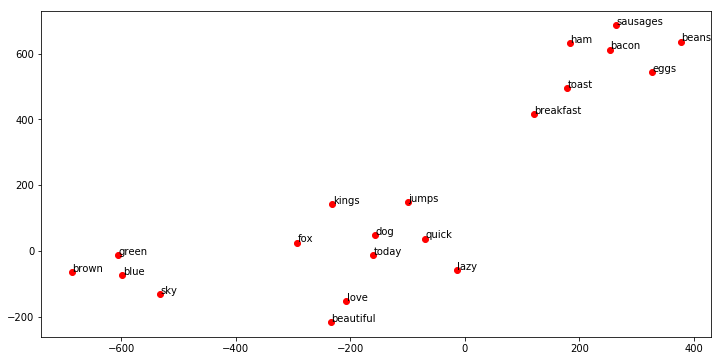

In [ ]:
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### Looking at term semantic similarity

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,sausages,lazy,beautiful,blue,fox,jumps,dog,breakfast,today,green,kings,sky,brown,bacon,eggs,beans,toast,love,ham,quick
sausages,1.000000,0.168205,0.114540,0.097443,0.133348,0.083306,0.247529,0.415231,0.094879,0.233169,0.070071,0.061753,0.289625,0.729162,0.548310,0.546647,0.498062,0.146917,0.622770,0.162966
lazy,0.168205,1.000000,0.294308,0.230513,0.267240,0.222112,0.301678,0.319941,0.286802,0.230945,0.190515,0.259361,0.256875,0.264376,0.236769,0.245672,0.231329,0.339280,0.222571,0.400060
beautiful,0.114540,0.294308,1.000000,0.461366,0.210050,0.142554,0.280658,0.314472,0.314184,0.392392,0.158615,0.428081,0.355700,0.151157,0.214437,0.165268,0.189482,0.594738,0.110936,0.289178
blue,0.097443,0.230513,0.461366,1.000000,0.371178,0.187263,0.314065,0.197103,0.180088,0.764083,0.207656,0.627800,0.683011,0.242987,0.297546,0.261304,0.232264,0.364961,0.185452,0.220331
fox,0.133348,0.267240,0.210050,0.371178,1.000000,0.250834,0.485855,0.165064,0.150072,0.323800,0.226735,0.303459,0.406912,0.210082,0.247314,0.118537,0.163371,0.255050,0.209454,0.192686
jumps,0.083306,0.222112,0.142554,0.187263,0.250834,1.000000,0.307961,0.103865,0.142099,0.150752,0.086659,0.278595,0.110400,0.091021,0.150622,0.095544,0.119099,0.185114,0.046432,0.301096
dog,0.247529,0.301678,0.280658,0.314065,0.485855,0.307961,1.000000,0.295957,0.223730,0.272693,0.156674,0.219087,0.341204,0.295123,0.291202,0.230778,0.182994,0.358715,0.262579,0.299892
breakfast,0.415231,0.319941,0.314472,0.197103,0.165064,0.103865,0.295957,1.000000,0.288788,0.288437,0.161841,0.205429,0.277158,0.487737,0.431108,0.378215,0.513436,0.245735,0.371688,0.358221
today,0.094879,0.286802,0.314184,0.180088,0.150072,0.142099,0.223730,0.288788,1.000000,0.246754,0.204743,0.256770,0.147418,0.158949,0.183048,0.147652,0.174257,0.371650,0.104115,0.370023
green,0.233169,0.230945,0.392392,0.764083,0.323800,0.150752,0.272693,0.288437,0.246754,1.000000,0.151519,0.488385,0.646850,0.386664,0.392072,0.462498,0.287608,0.327302,0.290761,0.287504


In [ ]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sausages           [bacon, ham, eggs]
lazy         [quick, love, breakfast]
beautiful           [love, blue, sky]
blue              [green, brown, sky]
fox                [dog, brown, blue]
jumps               [dog, quick, sky]
dog                [fox, love, brown]
breakfast        [toast, bacon, eggs]
today        [love, quick, beautiful]
green              [blue, brown, sky]
kings                [love, sky, fox]
sky          [blue, green, beautiful]
brown             [blue, green, eggs]
bacon          [ham, sausages, toast]
eggs         [bacon, beans, sausages]
beans         [bacon, eggs, sausages]
toast         [bacon, breakfast, ham]
love         [beautiful, today, blue]
ham          [bacon, sausages, toast]
quick        [lazy, today, breakfast]
dtype: object

# The FastText Model



In [ ]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

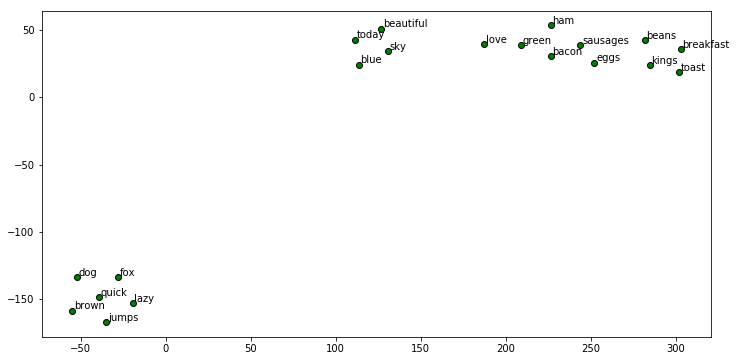

In [ ]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Embedding Operations

In [ ]:
ft_model['sky'], ft_model['sky'].shape

(array([-1.1745292 ,  1.3008002 , -0.62582475,  0.14681922, -0.46031192,
        -0.65553826, -0.1245426 , -0.09819014, -0.34571466,  0.23251319,
         0.03760778,  0.8506686 , -0.5574059 ,  0.03467001, -0.45169955],
       dtype=float32), (15,))

In [ ]:
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))

0.38875625
0.96545506


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
st1 = "dog fox ham"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))

st2 = "bacon ham sky sausages"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ dog fox ham ]: ham
Odd one out for [ bacon ham sky sausages ]: sky


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Getting document level embeddings



In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.017834,1.219471,-0.471404,0.100632,-0.485411,-0.580870,-0.183611,-0.032766,-0.266565,0.289460,0.074620,0.748789,-0.517958,0.038283,-0.297274
1,-1.051389,0.996752,-0.461333,0.187398,-0.399002,-0.535357,-0.133190,-0.102741,-0.235152,0.255751,0.070397,0.575714,-0.376731,0.007694,-0.241070
2,-0.080685,1.394714,1.015425,0.091486,-1.111383,-0.360878,-0.166006,0.346778,-0.375867,0.003422,0.676978,-0.001734,-0.380349,0.563245,0.395930
3,-1.443467,0.329564,-0.008377,1.037905,-0.312026,-0.233052,0.184552,-0.440906,-0.320137,-0.371566,0.666171,-0.895322,0.647324,-0.199162,-0.239623
4,-1.307474,0.324607,-0.140498,0.826300,-0.173477,-0.265190,0.072099,-0.486643,-0.283610,-0.157870,0.412292,-0.508161,0.427139,-0.166446,-0.225815
5,-0.189542,1.352578,0.803024,0.068530,-1.020865,-0.378753,-0.193295,0.301214,-0.350197,0.057726,0.584805,0.126631,-0.409361,0.484519,0.307555
6,-1.085396,1.229123,-0.536072,0.100034,-0.476581,-0.611018,-0.181043,-0.026112,-0.259882,0.283033,0.046487,0.772775,-0.532793,0.030967,-0.318839
7,-0.088025,1.415853,1.003639,0.080209,-1.119665,-0.375660,-0.176112,0.350506,-0.377900,0.002104,0.662523,0.023472,-0.398187,0.561428,0.385074


### Trying out document clustering


In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


 Principal Component Analysis (PCA)  to reduce the feature dimensions to 2-D and then visualizing the same (by color coding each cluster).

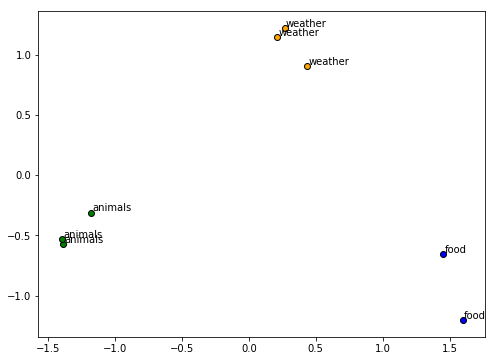

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')

Everything looks to be in order as documents in each cluster are closer to each other and far apart from other clusters.